In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
path = "/content/drive/MyDrive/IDS_SDN/meta.csv"
file1 = pd.read_csv(path)

In [13]:

path = "/content/drive/MyDrive/IDS_SDN/Normal.csv"
file2 = pd.read_csv(path)

In [14]:
df= pd.concat([file1, file2])
print(df)

                                        Flow ID          Src IP  Src Port  \
0      192.168.3.130-200.175.2.130-38694-4444-6   192.168.3.130     38694   
1      192.168.3.130-200.175.2.130-38693-4444-6   192.168.3.130     38693   
2      192.168.3.130-200.175.2.130-3632-33747-6   200.175.2.130     33747   
3      192.168.3.130-200.175.2.130-8180-38745-6   200.175.2.130     38745   
4      192.168.3.130-200.175.2.130-8180-37217-6   200.175.2.130     37217   
...                                         ...             ...       ...   
68419  185.127.17.56-192.168.20.133-443-36100-6  192.168.20.133     36100   
68420   192.168.20.133-192.168.20.2-53032-53-17  192.168.20.133     53032   
68421   192.168.20.133-192.168.20.2-39285-53-17  192.168.20.133     39285   
68422   192.168.20.133-192.168.20.2-49895-53-17  192.168.20.133     49895   
68423   192.168.20.133-192.168.20.2-33786-53-17  192.168.20.133     33786   

              Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \


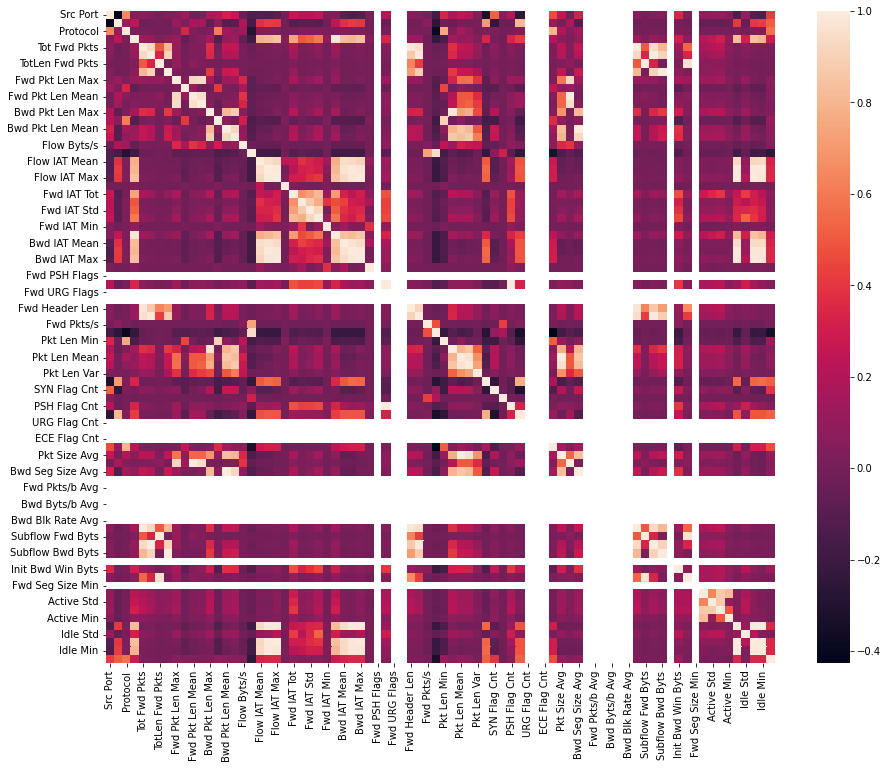

In [17]:
#df = df.dropna('columns')# drop columns with NaN


corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

In [15]:
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Label']= label_encoder.fit_transform(df['Label'])
 
df['Label'].unique()

array([5, 0, 1, 2, 4, 3])

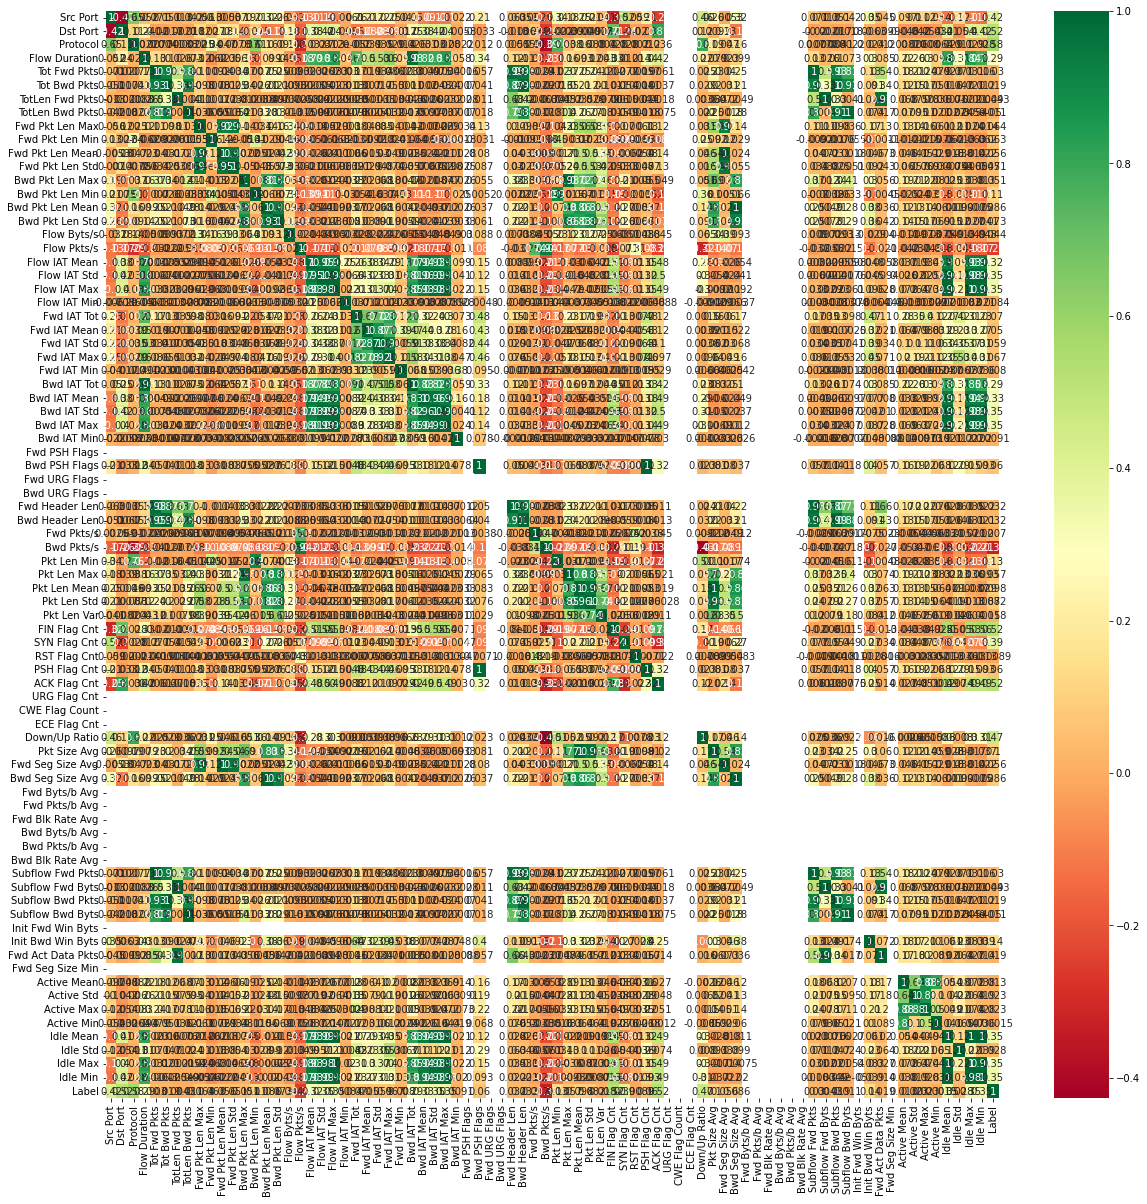

In [18]:
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

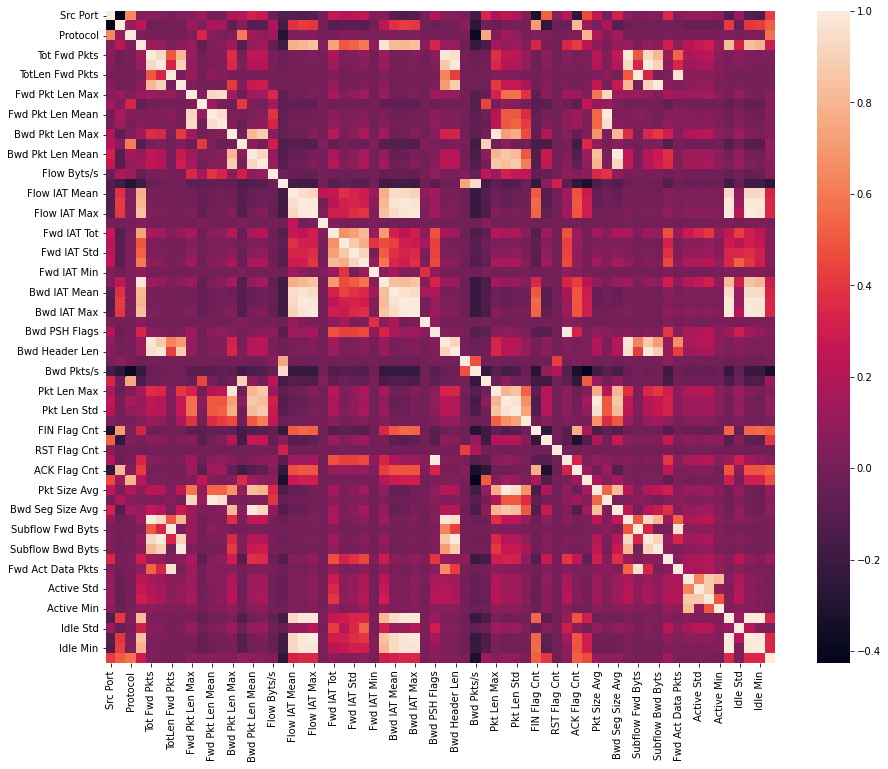

In [19]:
#df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize =(15, 12))

sns.heatmap(corr)

plt.show()

In [20]:
print(df)

                                        Flow ID          Src IP  Src Port  \
0      192.168.3.130-200.175.2.130-38694-4444-6   192.168.3.130     38694   
1      192.168.3.130-200.175.2.130-38693-4444-6   192.168.3.130     38693   
2      192.168.3.130-200.175.2.130-3632-33747-6   200.175.2.130     33747   
3      192.168.3.130-200.175.2.130-8180-38745-6   200.175.2.130     38745   
4      192.168.3.130-200.175.2.130-8180-37217-6   200.175.2.130     37217   
...                                         ...             ...       ...   
68419  185.127.17.56-192.168.20.133-443-36100-6  192.168.20.133     36100   
68420   192.168.20.133-192.168.20.2-53032-53-17  192.168.20.133     53032   
68421   192.168.20.133-192.168.20.2-39285-53-17  192.168.20.133     39285   
68422   192.168.20.133-192.168.20.2-49895-53-17  192.168.20.133     49895   
68423   192.168.20.133-192.168.20.2-33786-53-17  192.168.20.133     33786   

              Dst IP  Dst Port  Protocol       Timestamp  Flow Duration  \


In [21]:
dfd = df.drop(df.columns[[0,1,3,6]],axis=1)

In [22]:
print(dfd)

       Src Port  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  \
0         38694      4444         6         269709             4   
1         38693      4444         6         268599             2   
2         33747      3632         6          22194             5   
3         38745      8180         6           9556             4   
4         37217      8180         6           8782             4   
...         ...       ...       ...            ...           ...   
68419     36100       443         6           1895             0   
68420     53032        53        17           3842             1   
68421     39285        53        17           3731             1   
68422     49895        53        17          20591             0   
68423     33786        53        17           3039             1   

       Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0                 5             48.0             23.0               30   
1                 3              0.

In [23]:
Y = dfd.iloc[:,[65]]
X = dfd.iloc[:,0:64]

In [24]:
dfd.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 205167 entries, 0 to 68423
Data columns (total 66 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src Port           205167 non-null  int64  
 1   Dst Port           205167 non-null  int64  
 2   Protocol           205167 non-null  int64  
 3   Flow Duration      205167 non-null  int64  
 4   Tot Fwd Pkts       205167 non-null  int64  
 5   Tot Bwd Pkts       205167 non-null  int64  
 6   TotLen Fwd Pkts    205167 non-null  float64
 7   TotLen Bwd Pkts    205167 non-null  float64
 8   Fwd Pkt Len Max    205167 non-null  int64  
 9   Fwd Pkt Len Min    205167 non-null  int64  
 10  Fwd Pkt Len Mean   205167 non-null  float64
 11  Fwd Pkt Len Std    205167 non-null  float64
 12  Bwd Pkt Len Max    205167 non-null  int64  
 13  Bwd Pkt Len Min    205167 non-null  int64  
 14  Bwd Pkt Len Mean   205167 non-null  float64
 15  Bwd Pkt Len Std    205167 non-null  float64
 16  Flo

In [ ]:
Y

,Label
0,5
1,5
2,5
3,0
4,0
...,...
68419,3
68420,3
68421,3
68422,3


In [25]:
!pip install keras.utils 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=d2d927d3ca8841152fbf67fe5fe12fe35c1e2d892847ad89013c79e10f0916cf
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils


In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
#
# Import Keras modules
#
from keras import models
from keras import layers
from tensorflow.keras.utils import to_categorical
#
# Create the network
#
network = models.Sequential()

network.add(layers.Dense(128, activation='relu', input_shape=(64,)))

network.add(layers.Dense(64, activation='relu'))

network.add(layers.Dense(6, activation='softmax'))
#
# Compile the network
#
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)
#
# Create categorical labels
#
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)
#
# Fit the neural network
#
#network.fit(X_train, train_labels, epochs=20, batch_size=40)
#for plot graphs
history = network.fit(X_train, train_labels,
                    validation_data=(X_test, test_labels),
                    epochs=20,
                    batch_size=20)

Epoch 1/20
7181/7181 [==============================] - 29s 3ms/step - loss: 11230.6152 - accuracy: 0.9807 - val_loss: 7262.3325 - val_accuracy: 0.9916
Epoch 2/20
7181/7181 [==============================] - 26s 4ms/step - loss: 1662.9685 - accuracy: 0.9922 - val_loss: 1539.4869 - val_accuracy: 0.9947
Epoch 3/20
7181/7181 [==============================] - 25s 3ms/step - loss: 954.9376 - accuracy: 0.9935 - val_loss: 303.1123 - val_accuracy: 0.9952
Epoch 4/20
7181/7181 [==============================] - 25s 3ms/step - loss: 762.9904 - accuracy: 0.9937 - val_loss: 804.6462 - val_accuracy: 0.9955
Epoch 5/20
7181/7181 [==============================] - 25s 3ms/step - loss: 466.8323 - accuracy: 0.9920 - val_loss: 189.7962 - val_accuracy: 0.9915
Epoch 6/20
7181/7181 [==============================] - 25s 3ms/step - loss: 116.8754 - accuracy: 0.9691 - val_loss: 88.2019 - val_accuracy: 0.9751
Epoch 7/20
7181/7181 [==============================] - 25s 3ms/step - loss: 98.4712 - accuracy: 0.965

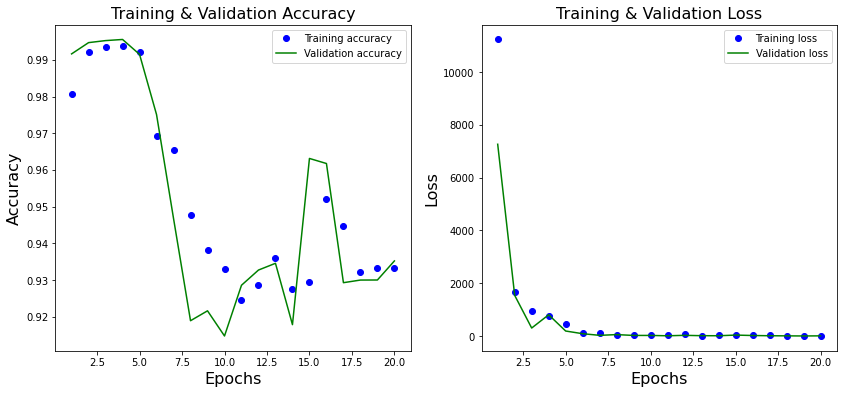

In [28]:
import matplotlib.pyplot as plt
 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'g', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'g', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [29]:
print(X_test)

        Src Port  Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  \
85540      44861      2622         6              7             0   
98243         80     37969         6       63016444             3   
80990      37063      2357         6             54             0   
23063      33862        53        17           3381             1   
52929      35239        53        17           3397             1   
...          ...       ...       ...            ...           ...   
40223      44522        53        17           6799             1   
17798          0         0         0             16             0   
129889     46326        80         6          60827             4   
122743        80     33467         6       67609044             3   
64829      51847        53        17           4008             1   

        Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
85540              2              0.0              0.0                0   
98243              7 

In [30]:
y_test

,Label
85540,4
98243,4
80990,4
23063,3
52929,3
...,...
40223,3
17798,1
129889,4
122743,4


In [31]:
#
# Get the accuracy of test data set
#
test_loss, test_acc = network.evaluate(X_test, test_labels)
#
# Print the test accuracy
#
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

1924/1924 [==============================] - 4s 2ms/step - loss: 6.6544 - accuracy: 0.9352
Test Accuracy:  0.9351919293403625 
Test Loss:  6.654447555541992


Saving the trained model

In [32]:
network.save('ANN/idsann.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import tensorflow as tf

Loading the saved model

In [ ]:
new_model = tf.keras.models.load_model('ANN/idsann.h5') #same file path

Testing the model



In [ ]:
loss, acc = loss, acc = new_model.evaluate(X_test[9:10], test_labels[9:10], verbose=0)



In [ ]:
print(test_labels[1900:1901])